# Introduction to Data Science 2025

# Week 3

## Exercise 1 | Working with geospatial data (GIS)

To get at least a bit familiar with [GIS](https://en.wikipedia.org/wiki/Geographic_information_system) data and the concept of map projections, we’ll do a simple task of plotting two data sets that are given in different coordinate systems.

1. Download the [world_m.zip](https://github.com/HY-TKTL/intro-to-data-science-2017/blob/master/world_m.zip) and [cities.zip](https://github.com/HY-TKTL/intro-to-data-science-2017/blob/master/cities.zip) files that each include a set of GIS files. Most notably, the <span style="font-weight: bold">shp</span> files are [Shapefile-files](https://en.wikipedia.org/wiki/Shapefile) with coordinates (don’t look, it’s binary!). The <span style="font-weight: bold">prj</span> files contain information (in plain text, so okay to look) about the coordinate systems. Open the files using your favorite programming environment and packages.  

    <span style="font-weight: 500"> *Hint: We warmly recommend [Geopandas](http://geopandas.org/) for pythonistas.*</span>

In [ ]:
#My notes:
#GIS = Geographic Information System.
#A GIS file stores geographic data: shapes, locations, boundaries, and attributes (e.g. country names, population).
#There are many GIS file formats (Shapefile, GeoJSON, GeoTIFF, etc.).
#.shp, .prj, .dbf, .shx, .cpg = the parts that together make up a shapefile

#A .shp file is the main file in the Shapefile format.
#It stores the geometry of spatial features (points, lines, polygons).

#A .prj file is a plain text file that describes the projection / coordinate system of the data.
#It tells software how to interpret the coordinates in the .shp file:
#Are they longitude/latitude (WGS84, EPSG:4326)?
#Or projected coordinates (e.g., meters in Mercator, UTM)?


import geopandas as gpd
import matplotlib.pyplot as plt

world=gpd.read_file("world_m/world_m.shp")

cities=gpd.read_file("cities/cities.shp")

print(world.head())
print(cities.head())
print(world.crs)
print(cities.crs)


      pop_est      continent                  name iso_a3  gdp_md_est  \
0  28400000.0           Asia           Afghanistan    AFG     22270.0   
1  12799293.0         Africa                Angola    AGO    110300.0   
2   3639453.0         Europe               Albania    ALB     21810.0   
3   4798491.0           Asia  United Arab Emirates    ARE    184300.0   
4  40913584.0  South America             Argentina    ARG    573900.0   

   gdp_per_ca                                           geometry  
0    0.000784  POLYGON ((6813956.99 4227673.562, 6927484.435 ...  
1    0.008618  MULTIPOLYGON (((1817460.823 -651055.118, 18449...  
2    0.005993  POLYGON ((2292095.859 5110825.73, 2277950.23 5...  
3    0.038408  POLYGON ((5741805.754 2765811.385, 5761611.935...  
4    0.014027  MULTIPOLYGON (((-7291426.647 -7365665.131, -73...  
           name                   geometry
0  Vatican City  POINT (12.45339 41.90328)
1    San Marino   POINT (12.44177 43.9361)
2         Vaduz   POINT (9.516

2. The <span style="font-weight: bold">world_m</span> file contains borders of almost all countries in the world. Plot the world.

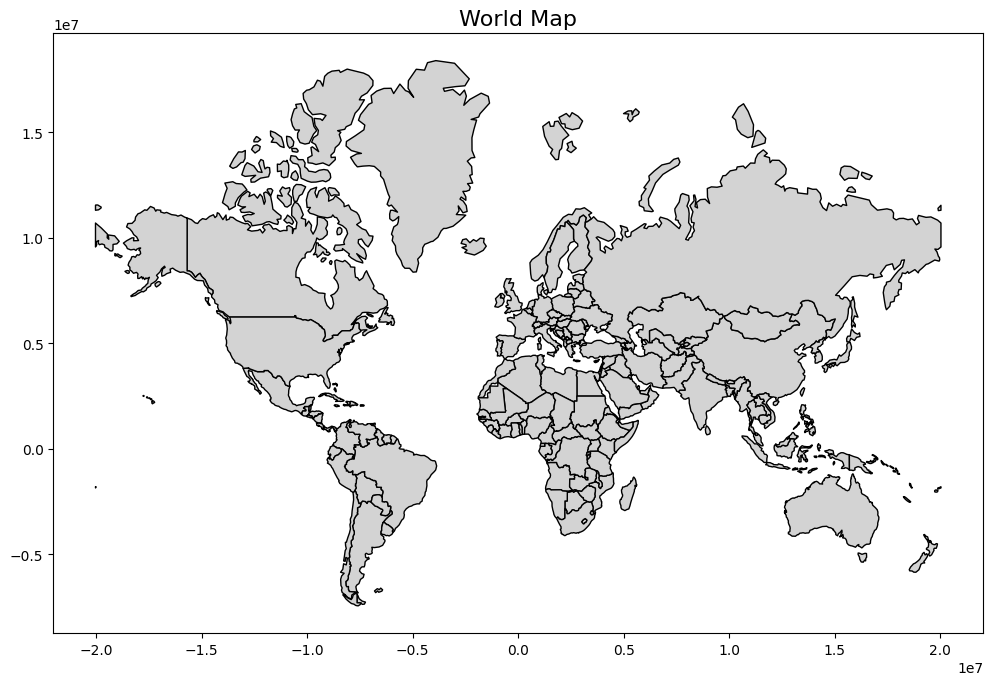

In [17]:
world.plot(figsize=(12, 8), color="lightgrey", edgecolor="black")
plt.title("World Map", fontsize=16)
plt.show()

3. On top of the countries that you just plotted, plot another layer of information, namely the capital cities of each country from the <span style="font-weight: bold">cities</span> dataset. However, depending on how clever your programming environment is, the cities will probably all appear to be in the Gulf of Guinea, near the coordinates (0°, 0°).

World CRS: EPSG:3395
Cities CRS before: EPSG:4326
Cities CRS after: EPSG:3395


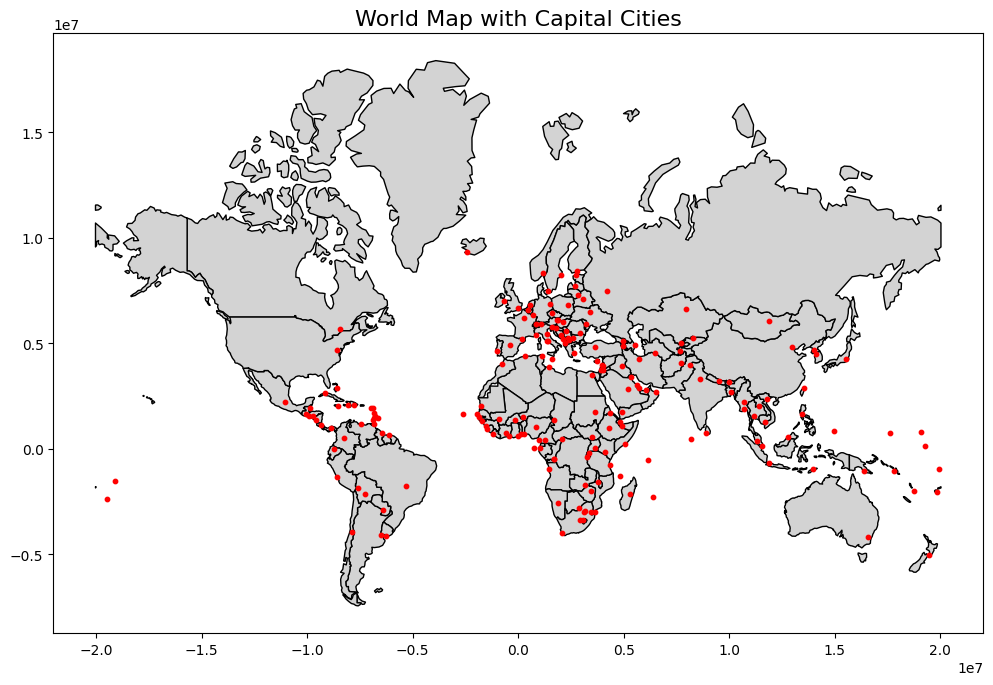

In [18]:

print("World CRS:", world.crs)
print("Cities CRS before:", cities.crs)
cities = cities.to_crs(world.crs)
print("Cities CRS after:", cities.crs)
cities = cities.to_crs(world.crs)
fig, ax = plt.subplots(figsize=(12, 8))

# Plot countries
world.plot(ax=ax, color="lightgrey", edgecolor="black")

# Plot capital cities
cities.plot(ax=ax, color="red", markersize=10)

plt.title("World Map with Capital Cities", fontsize=16)
plt.show()


4. Perform a map projection to bring the two data-sets into a shared coordinate system. (You can choose which one.) Now plot the two layers together to make sure the capital cities are where they are supposed to be.

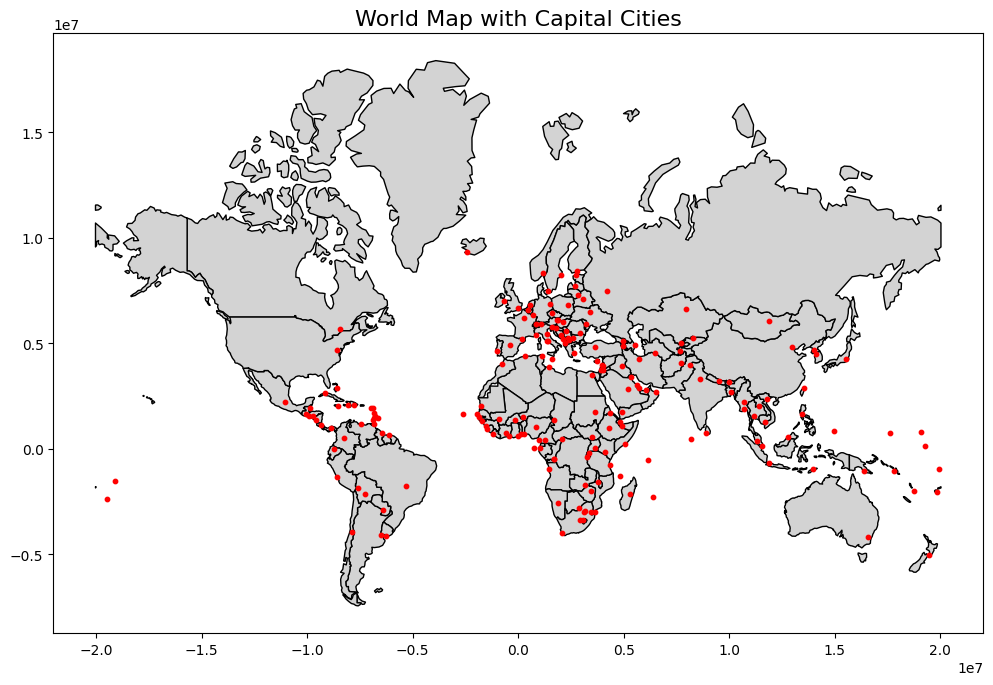

In [20]:


fig, ax = plt.subplots(figsize=(12, 8))

# Plot countries
world.plot(ax=ax, color="lightgrey", edgecolor="black")

# Plot capital cities
cities.plot(ax=ax, color="red", markersize=10)

plt.title("World Map with Capital Cities", fontsize=16)
plt.show()


**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 2 | Symbol classification

We’ll be looking into machine learning by checking out the [HASYv2](https://zenodo.org/record/259444#.Wb7efZ8xDhZ) dataset that contains hand written mathematical symbols as images. The whole dataset is quite big, so we’ll restrict ourselves to doing 10-class classification on some of the symbols. Download the data and complete the following tasks.

1. Extract the data and find inside a file called <span style="font-weight: bold">hasy-data-labels.csv</span>. This file contains the labels for each of the images in the <span style="font-weight: bold">hasy_data</span> folder. Read the labels in and only keep the rows where the <span style="font-weight: bold">symbol_id</span> is within the inclusive range <span style="font-weight: bold">[70, 79]</span>. Read the corresponding images as black-and-white images and flatten them so that each image is a single vector of shape <span style="font-weight: bold">32x32 = 1024</span>. Your dataset should now consist of your input data of shape <span style="font-weight: bold">(1020, 1024)</span> and your labels of shape <span style="font-weight: bold">(1020, )</span>. That is, a matrix of shape <span style="font-weight: bold">1020 x 1024</span> and a vector of size <span style="font-weight: bold">1020</span>.

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
import os

data_dir="HASYv2"
labels_fp=os.path.join(data_dir, "hasy-data-labels.csv")
#os.path.join() is a cross-platform way to combine folder paths and file names
#Result: labels_fp- is the full path to the labels file, e.g., "HASYv2/hasy-data-labels.csv".
labels = pd.read_csv(labels_fp)
print(labels.columns)
print(labels.shape)
# Typically: ['symbol_id', 'symbol_name', 'path']
print(labels.head())

subset_labels=labels[(labels['symbol_id']>=70) & (labels['symbol_id']<=79)].reset_index(drop=True)
print(subset_labels.shape)

X=[]

y=[]

for idx, row in subset_labels.iterrows():
    img_path=os.path.join(data_dir, row['path'])
    img=Image.open(img_path).convert('L')
    img_vector=np.array(img).flatten()
    X.append(img_vector)
    y.append(row['symbol_id'])

X=np.array(X)
#X is an array containing vectors 

y=np.array(y)
#y is an array containing symbol_id

print("X shape:", X.shape)  # should be (1020, 1024)
print("y shape:", y.shape)  # should be (1020,)



Index(['path', 'symbol_id', 'latex', 'user_id'], dtype='object')
(168233, 4)
                     path  symbol_id latex  user_id
0  hasy-data/v2-00000.png         31     A       50
1  hasy-data/v2-00001.png         31     A       10
2  hasy-data/v2-00002.png         31     A       43
3  hasy-data/v2-00003.png         31     A       43
4  hasy-data/v2-00004.png         31     A     4435
(1020, 4)
X shape: (1020, 1024)
y shape: (1020,)


2. Randomly shuffle the data, and then split it into training and test sets, using the first 80% of the data for training and the rest for evaluation.

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (816, 1024) (816,)
Test shape: (204, 1024) (204,)


3. Fit a logistic regression classifier on the data. Note that we have a multi-class classification problem, but logistic regression is a binary classifier. For this reason, you will find useful <span style="font-weight: bold">[Sklearn's "multi_class" attribute](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)</span>. Use a multinomial loss and the softmax function to predict the probability of each class as the outcome.  The classifier should select the class with the highest probability. Most library implementations will do this for you - feel free to use one.

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",   # good choice for multinomial + softmax
    max_iter=1000     # increase iterations to ensure convergence
)

# clf is now untrained model

clf.fit(X_train, y_train)
#.fit() → the model looks at the training data and learns which pixel patterns match which class.
# Predict on test set
#now clf is trained model

y_pred = clf.predict(X_test)
# X_test → new images the model has never seen before.
# .predict() → the model guesses the most likely class (symbol) for each image
# y_pred → the model’s predictions, e.g. [72, 70, 79, 71, ...].

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
# y_test → the true labels (the real answers)
# y_pred → the model’s guessed answers.
# accuracy_score() → calculates how many guesses are correct (correct / total).

# The printed number (e.g., 0.78) means 78% of the test symbols were classified correctly

c:\Users\HP LAPTOP 15S-FQ2023\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Test Accuracy: 0.8529411764705882


4. In order to evaluate the model, let’s create our own dummy classifier that simply guesses the most common class in the training set (looking at the test set here would be cheating!). Then, evaluate your logistic regression model on the test data, and compare it to the majority class classifier. The logistic regression model should have significantly better accuracy as the dummy model is merely making a guess.

    <span style="font-weight: 500"> *Hint: Sklearn's DummyClassifier( ) might save you a bit of time.*</span>

In [35]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)  
y_dummy_pred=dummy_clf.predict(X_test)

dummy_accuracy = accuracy_score(y_test, y_dummy_pred)
print("Test Accuracy:", dummy_accuracy)

Test Accuracy: 0.09803921568627451


5. Plot some of the images that the logistic classifier misclassified. Can you think of an explanation why they were misclassified? Would you have gotten them right?
    
    <span style="font-weight: 500">*Hint: Matplotlib has a [function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) that can help you with plotting.*</span>
Here are some examples of the syntax used to fit a logistic regression classifier (using Sklearn or statsmodel with Python, or GLM with R):

Number of misclassified images: 30


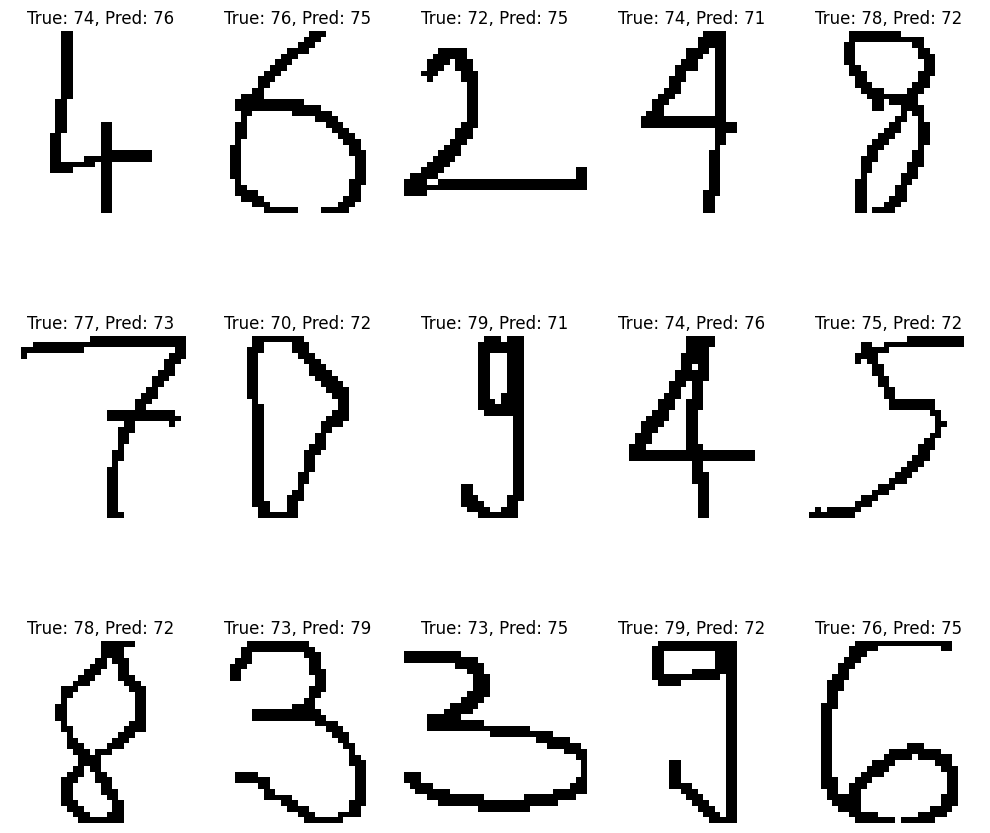

In [41]:
#Sklearn (python)

from sklearn.linear_model import LogisticRegression
misclassified_idx = np.where(y_pred != y_test)[0]
#np.where returns a tuple of arrays, one for each dimeansion of the input
#e.g (array([1, 3]),)-tuple of arrays
#y_pred != y_test → a Boolean array of the same length as y_test, with True where the prediction was wrong
#indices_array is just a 1D NumPy array, easier to work with
print(f"Number of misclassified images: {len(misclassified_idx)}")

plt.figure(figsize=(10, 10))

for i, idx in enumerate(misclassified_idx[:15]):
#misclassified_idx[:9] → first 9 misclassified sample indices.
#enumerate(...) → gives: i → 0 to 8 → used to place images in the subplot grid
#idx → actual index in X_test of the misclassified image.
    plt.subplot(3, 5, i+1)           # 3x3 grid
    img = X_test[idx].reshape(32, 32)  # reshape flattened vector back to 32x32
    plt.imshow(img, cmap='gray')     # plot as grayscale
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()




In [ ]:
#There are a couple of possible reasons why images were misclasified by a model:
#-symbols look very similar 
#-patterns are hard to recognize because different people draw symbols differently
#-small image size(32x35), limited resolution,, therefore some details may be lost
#-Logistic regression is linear in the features (pixels). Complex non-linear patterns might not be captured.

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**